**<span style="color: #808080;">In The Name of God</span>**

---

**<span style="color: #808080;">Erfan Falahati</span>**

**<span style="color: #808080;">SID:</span> <span style="color: #808080;">810102491</span>**

# <span style="color: #20B2AA;">Question #3</span>
# <span style="color: #20B2AA;">Drug Safety Test
</span>




## <span style="color: #808080;">Part 1:</span>  
<font color="#20B2AA">Read the csv file</font>

In [62]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv('content/drug_safety.csv')

## <span style="color: #808080;">Part 2:</span>  


<font color="#20B2AA">Check for  count of NaN datas</font>

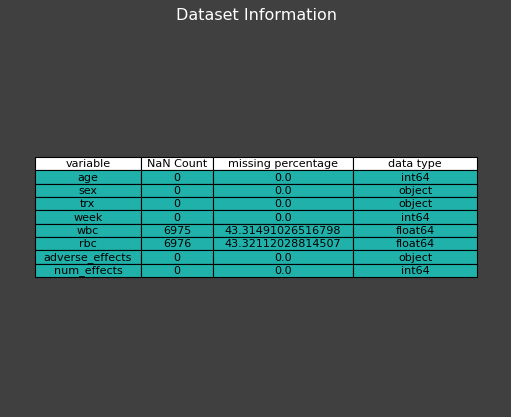

In [63]:
info_df = pd.DataFrame({
    "column": df.columns,
    "nan count": df.isna().sum().values,
    "missing_percentage": df.isna().mean() * 100,
    "data type": df.dtypes.values
})

plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
fig.patch.set_facecolor('#404040')

column_labels = ['variable', 'NaN Count', 'missing percentage', 'data type']
table = ax.table(cellText=info_df.values, colLabels=column_labels,
            cellLoc='center', loc='center', cellColours=[["#20B2AA"]*4]*8)

table.set_fontsize(10)
table.auto_set_column_width([0, 1, 2])

plt.title("Dataset Information", color='white')
plt.show()



<font color="#20B2AA"> Approximately 43% of the data contains NaN values.</font>

<font color="#20B2AA"> However, since the data is related to the medical field, we prefer to drop rows with missing values.</font>

In [64]:
df_cleaned = df.dropna()

## <span style="color: #808080;">Part 3:</span>  
<font color="#20B2AA">Display Basic Statistic</font>



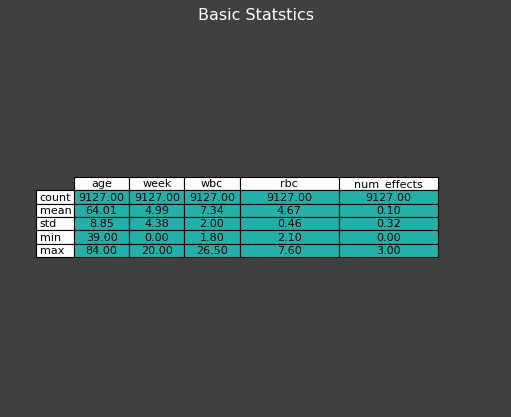

In [65]:
desc_df = df_cleaned.describe().map(lambda x: f"{x:.2f}")

dropped_desc_df = desc_df.drop(['25%', '50%', '75%'])

plt.style.use("classic")
fig, ax = plt.subplots(figsize=(8, 6))
ax.axis('off')
fig.patch.set_facecolor('#404040')

column_labels = dropped_desc_df.columns.values
raw_labels = dropped_desc_df.index.values
table = ax.table(cellText=dropped_desc_df.values, colLabels=column_labels, rowLabels=raw_labels,
            cellLoc='center', loc='center', cellColours=[["#20B2AA"]*5]*5)

table.set_fontsize(10)
table.auto_set_column_width([0,1,2])

plt.title("Basic Statstics", color='white')
plt.show()

## <span style="color: #808080;">Part 4:</span>  
<font color="#20B2AA">Goup the Dataset by trx </font>

In [66]:
drug_group = df_cleaned[df_cleaned["trx"] == "Drug"].copy()
placebo_group = df_cleaned[df_cleaned["trx"] == "Placebo"].copy()

<font color="#20B2AA">Summarize key statistic for wbc, rbc and num_effects</font></font>

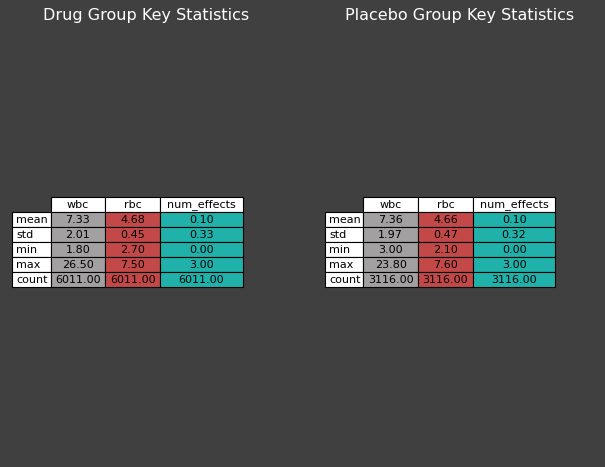

In [67]:
drug_stats = drug_group[['wbc', 'rbc', 'num_effects']].agg(["mean", "std", "min", "max", "count"]).map(lambda x: f"{x:.2f}")
placebo_stats = placebo_group[['wbc', 'rbc', 'num_effects']].agg(["mean", "std", "min", "max", "count"]).map(lambda x: f"{x:.2f}")

plt.style.use("classic")
fig, (ax1, ax2) = plt.subplots(figsize=(8, 6), ncols=2)

ax1.axis('off')
fig.patch.set_facecolor('#404040')
column_labels = drug_stats.columns.values
raw_labels = drug_stats.index.values
table1 = ax1.table(cellText=drug_stats.values, colLabels=column_labels, rowLabels=raw_labels,
                  cellLoc='center', loc='center', 
                  cellColours=[["#A2A0A0", "#C34949", "#20B2AA"]]*5)

table1.set_fontsize(10)
table1.auto_set_column_width([0, 1, 2])
ax1.set_title("Drug Group Key Statistics", color='white')

ax2.axis('off')
column_labels = placebo_stats.columns.values
raw_labels = placebo_stats.index.values
table2 = ax2.table(cellText=placebo_stats.values, colLabels=column_labels, rowLabels=raw_labels,
                  cellLoc='center', loc='center', 
                  cellColours=[["#A2A0A0", "#C34949", "#20B2AA"]]*5)

table2.set_fontsize(10)
table2.auto_set_column_width([0, 1, 2])
ax2.set_title("Placebo Group Key Statistics", color='white')

plt.tight_layout()
plt.show()

## <span style="color: #808080;">Part 5:</span>  

<font color="#20B2AA">Since adverse_effects is a yes/no variable, we need to convert it into a numeric format before calculating the mean:</font>  

<font color="#20B2AA">Yes → 1</font>  
<font color="#20B2AA">No → 0</font>  


In [68]:
drug_group['adverse_effects'] = drug_group['adverse_effects'].map({'Yes': 1, 'No': 0}).astype('int64')
placebo_group['adverse_effects'] = placebo_group['adverse_effects'].map({'Yes': 1, 'No': 0}).astype('int64')

print('adverse_effects mean for drug group:', drug_group['adverse_effects'].mean())
print('adverse_effects mean for placebo group:', placebo_group['adverse_effects'].mean())

adverse_effects mean for drug group: 0.09599068374646481
adverse_effects mean for placebo group: 0.09210526315789473


## <span style="color: #808080;">Part 6:</span>  

**<span style="color:#20B2AA;">alternative argument:</span>** 
It tests if the means of the two groups are different (two-tailed test)

**Since we are checking for any significant difference , we use a `two-sided` test.**

options : `two-sided`, `greater`, `less`

**<span style="color:#20B2AA;">equal-var argument:</span>** 
The equal_var argument controls whether we assume equal variances between the two groups (Drug and Placebo).

To ensure the use of `equal_var` for each metric, we run **Levene’s test**.

options : `True`, `False` 

**<font color="#20B2AA">Performing Levene’s test</font>**

In [69]:
import scipy.stats as stats

metrics = ['wbc', 'rbc', 'num_effects', 'adverse_effects']

for metric in metrics:
    stat, p_value = stats.levene(drug_group[metric], placebo_group[metric])

    print(f"Levene’s test for mean {metric}")
    print(f"Levene’s test p-value: {p_value:.5f}")

    if p_value > 0.05:
        print("Variances are equal → Use equal_var=True")
    else:
        print("Variances are different → Use equal_var=False")
        
    print("*"*60)


Levene’s test for mean wbc
Levene’s test p-value: 0.93292
Variances are equal → Use equal_var=True
************************************************************
Levene’s test for mean rbc
Levene’s test p-value: 0.13182
Variances are equal → Use equal_var=True
************************************************************
Levene’s test for mean num_effects
Levene’s test p-value: 0.48929
Variances are equal → Use equal_var=True
************************************************************
Levene’s test for mean adverse_effects
Levene’s test p-value: 0.54773
Variances are equal → Use equal_var=True
************************************************************


**<font color="#20B2AA">Performing t-test</font>**

- **<span style="color:#20B2AA;">Null Hypothesis (H₀):</span>** There is no significant difference between the Drug and Placebo groups.  
- **<span style="color:#20B2AA;">Alternative Hypothesis (H₁):</span>** There is a significant difference between the Drug and Placebo groups.

### <font color="#20B2AA"> What does this significance level mean?</font>

#### <font color="#20B2AA">α = 0.05 (common threshold):</font>
- 5% chance of rejecting the null hypothesis when it is actually true (Type I error).
- 95% confidence that the observed results are not due to random chance.

#### <font color="#20B2AA">α = 0.1:</font>
- allowing a 10% chance of rejecting the null hypothesis when it is true.
- It provides **weaker evidence** for rejecting the null hypothesis compared to 0.05.


In [70]:
alterantive_arg = 'two-sided'

for metric, equal_var_arg in zip(metrics, [True, False, True, True]):
    _, p_value = stats.ttest_ind(placebo_group[metric], drug_group[metric], equal_var=equal_var_arg, alternative=alterantive_arg)
    print(f"t-test for mean {metric}:")
    print(f"p-value = {p_value:.5f}")

    if p_value < 0.05:
        print("Reject H₀ at α = 0.05")
    elif p_value < 0.1:
        print("Reject H₀ at α = 0.1 ")
    else:
        print("Fail to reject H₀ (No significant difference)")

    print("*"*60)


t-test for mean wbc:
p-value = 0.51190
Fail to reject H₀ (No significant difference)
************************************************************
t-test for mean rbc:
p-value = 0.06821
Reject H₀ at α = 0.1 
************************************************************
t-test for mean num_effects:
p-value = 0.48929
Fail to reject H₀ (No significant difference)
************************************************************
t-test for mean adverse_effects:
p-value = 0.54773
Fail to reject H₀ (No significant difference)
************************************************************
